In [1]:
import csv
from collections import defaultdict
import numpy as np


def extract_err_timeseries(fn, with_epoch=False):
    print 'reading from %s' % fn
    with open(fn) as csvfile:
        cr = csv.reader(csvfile)
        header = cr.next()
        lines = defaultdict(list)

        for row in cr:
            for k, v in zip(header, row):
                lines[k].append(v)
        if not with_epoch:
            del lines['epoch']

        for k in lines.keys():
            lines[k] = np.array(lines[k])

        return header, lines

In [2]:
filename = '/home/nykh/Documents/cs224n/proj/code/history/pred_pair_L1diff-2.csv'

In [3]:
output_filename = 'errplot-pred_pair_L1diff-special.png'

In [6]:
import matplotlib.pyplot as plt
import seaborn as sbn  # optional, purely for aesthetic
%matplotlib inline

In [7]:
_, errs = extract_err_timeseries(filename, with_epoch=True)
xs = errs['epoch']
del errs['epoch']

reading from /home/nykh/Documents/cs224n/proj/code/history/pred_pair_L1diff-2.csv


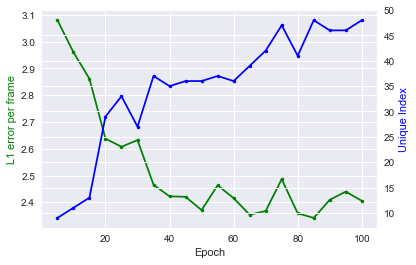

In [21]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# norm
ax1.plot(xs, errs['norm'], 'g.-', label='L1 error per frame')
# uniqIdx
ax2.plot(xs, errs['uniqIdx'], 'b.-', label='Unique Index')

ax1.set_ylabel('L1 error per frame', color='g')
    ax2.set_ylabel('Unique Index', color='b')
ax1.set_xlabel('Epoch')
plt.savefig(output_filename)

In [18]:
from collections import deque, defaultdict

def get_last_row(csv_filename):
    """
    getting last row from csv file
    thanks to
     http://stackoverflow.com/questions/20296955/reading-last-row-from-csv-file-python-error
    """
    with open(csv_filename, 'r') as f:
        try:
            lastrow = deque(csv.reader(f), 1)[0]
        except IndexError:  # empty file
            lastrow = None
        return lastrow


def extract_data(pat):
    file0 = csv.reader(open(pat.format(0.0)))
    header = file0.next()
    lines = defaultdict(list)

    for i in range(0, 11):
        ratio = i / 10.  # floating number 0.0 - 1.0
        filename = pat.format(ratio)
        print "reading file %s" % filename
        lastrow = get_last_row(filename)
        for k, v in zip(header, lastrow):
            lines[k].append(v)

    return header, lines

In [19]:
filename_pat = "GRU_LM_nodes128_{:1}.csv"

In [20]:
header, lines = extract_data(filename_pat)
del lines['epoch']
del header[0]

reading file GRU_LM_nodes128_0.0.csv
reading file GRU_LM_nodes128_0.1.csv
reading file GRU_LM_nodes128_0.2.csv
reading file GRU_LM_nodes128_0.3.csv
reading file GRU_LM_nodes128_0.4.csv
reading file GRU_LM_nodes128_0.5.csv
reading file GRU_LM_nodes128_0.6.csv
reading file GRU_LM_nodes128_0.7.csv
reading file GRU_LM_nodes128_0.8.csv
reading file GRU_LM_nodes128_0.9.csv
reading file GRU_LM_nodes128_1.0.csv


In [21]:
xs = np.arange(0, 11).astype(np.float) / 10
assert len(xs) == len(lines['train1'])

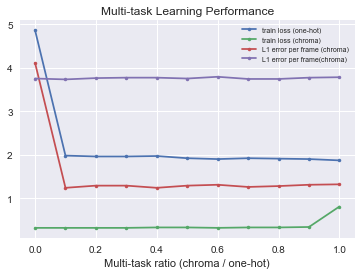

In [25]:
plt.plot(xs, lines['train1'], '.-', label='train loss (one-hot)')
plt.plot(xs, lines['train12'], '.-', label='train loss (chroma)')
plt.plot(xs, lines['err1'], '.-', label='L1 error per frame (chroma)')
plt.plot(xs, lines['err12'], '.-', label='L1 error per frame(chroma)')


plt.xlabel('Multi-task ratio (chroma / one-hot)')
plt.title('Multi-task Learning Performance')
plt.legend(fontsize='x-small')
plt.savefig('mtl-perf-plot.png')

In [1]:
import csv
from collections import defaultdict
import numpy as np


def extract_err_timeseries(fn, with_epoch=False):
    print 'reading from %s' % fn
    with open(fn) as csvfile:
        cr = csv.reader(csvfile)
        header = cr.next()
        lines = defaultdict(list)

        for row in cr:
            for k, v in zip(header, row):
                lines[k].append(v)
        if not with_epoch:
            del lines['epoch']

        for k in lines.keys():
            lines[k] = np.array(lines[k])

        return header, lines

In [2]:
import matplotlib.pyplot as plt
import seaborn as sbn  # optional, purely for aesthetic
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
filename = '/home/nykh/Documents/cs224n/proj/code/history/GRU_LM_MTL_128_0.5.csv'

In [5]:
output_filename = 'mtl-err-plot.png'

In [6]:
_, errs = extract_err_timeseries(filename, with_epoch=True)
xs = errs['epoch']
del errs['epoch']

reading from /home/nykh/Documents/cs224n/proj/code/history/GRU_LM_MTL_128_0.5.csv


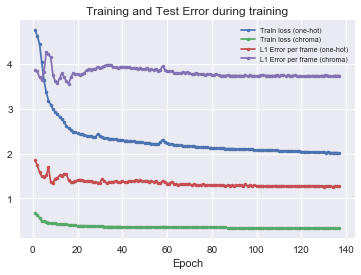

In [17]:
plt.plot(xs, errs['train1'], '.-', label='Train loss (one-hot)')
plt.plot(xs, errs['train12'], '.-', label='Train loss (chroma)')
plt.plot(xs, errs['err1'], '.-', label='L1 Error per frame (one-hot)')
plt.plot(xs, errs['err12'], '.-', label='L1 Error per frame (chroma)')

plt.legend(fontsize='x-small')
plt.xlabel('Epoch')
plt.title('Training and Test Error during training')
plt.savefig(output_filename)